# AirplaneHubs Datastory
- Welche Flughäfen weisen einen hohen Flugverkehr auf?                            -> Verkehr an Flughäfen
- Welche Flughäfen weisen die meisten Verbindungen auf?                           -> Verkehr an Flughäfen
- Welches sind die längsten Distanzen die zurückgelegt werden?                    -> Distanzen
- Welche Flughäfen können als Verkehrsknotenpunkt identifiziert werden?           -> Verkehr an Flughäfen
- Welche Unterschiede in den Flugbewegungen sind im Sommer zum Frühling zu sehen? -> Unterschied Mai Sept

In [1]:
#load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descriptive_stats as ds
import plotly.express as px
import seaborn as sns

df_airports = pd.read_csv("data/preprocessed/airports.csv")
df_flights = pd.read_csv("data/preprocessed/flights.csv")

C:\Users\schny\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### Flugverkehr an Flughäfen
Als erstes möchten wir bestimmen, welche Flughäfen den höchsten Flugverkehr aufweisen. Dafür untersuchen wir das ganze Datenset mit allen Takeoffs und Landings separiert sowie zusammen. 

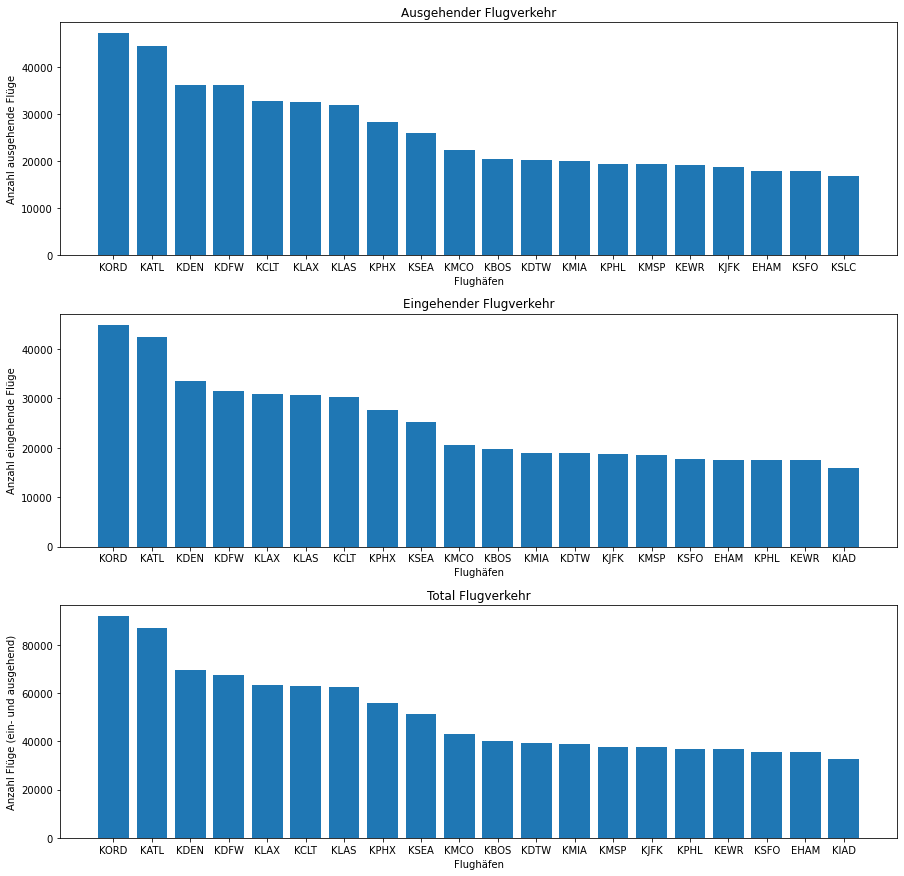

In [2]:
#bar charts for in and outgoing flight trafic
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
outgoing = df_airports.sort_values(['takeoffs'], ascending=False).head(20)

#outgoing flight trafic (top 20 airports)
_ = ax[0].bar(outgoing["ident"], outgoing["takeoffs"])
_ = ax[0].set_title("Ausgehender Flugverkehr")
_ = ax[0].set_xlabel("Flughäfen")
_ = ax[0].set_ylabel("Anzahl ausgehende Flüge")

incoming = df_airports.sort_values(['landings'], ascending=False).head(20)

#incoming flight trafic (top 20 airports)
_ = ax[1].bar(incoming["ident"], incoming["landings"])
_ = ax[1].set_title("Eingehender Flugverkehr")
_ = ax[1].set_xlabel("Flughäfen")
_ = ax[1].set_ylabel("Anzahl eingehende Flüge")

total = df_airports.sort_values(['total'], ascending=False).head(20)

_ = ax[2].bar(total['ident'], total['total'])
_ = ax[2].set_title("Total Flugverkehr")
_ = ax[2].set_xlabel("Flughäfen")
_ = ax[2].set_ylabel("Anzahl Flüge (ein- und ausgehend)")

#add vertical space between subplots
_ = plt.subplots_adjust(hspace=.25)


Die dargestellten Flughäfen befinden sich ausschlieslich in USA. Flughäfen aus Europa, Asien oder Afrika sind nicht mehr auf der Visualisierung zu erkennen. Um Knotenpunkte zu identifizieren, untersuchen wir die Bewegungen erneut separiert nach Regionen. Als erstes möchten wir jedoch die Anzahl Flugbewegungen pro Region aufzeigen.

<AxesSubplot:xlabel='region'>

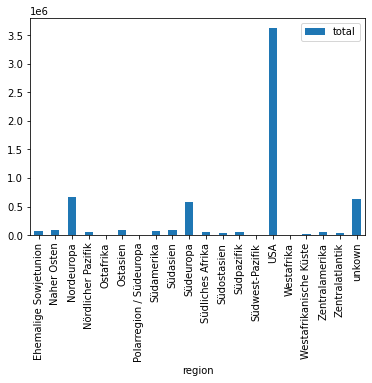

In [15]:
o = df_airports.groupby(['region'], as_index=False)['total'].sum()
o.plot(x='region', y='total', kind='bar')

Der Unterschied zwischen der USA zu anderen Regionen ist sehr gross. Um Knotenpunkte zu identifizieren, müssen Flughäfen in ihrer Region unterschieden werden (Knotenpunkt = hoher Verkehr in seiner Region). Ein weiteres Indiz um Knotenpunkte zu identifizieren, sind Transit-Flüge welche jedoch im Datenset so nicht direkt erkennbar sind. 

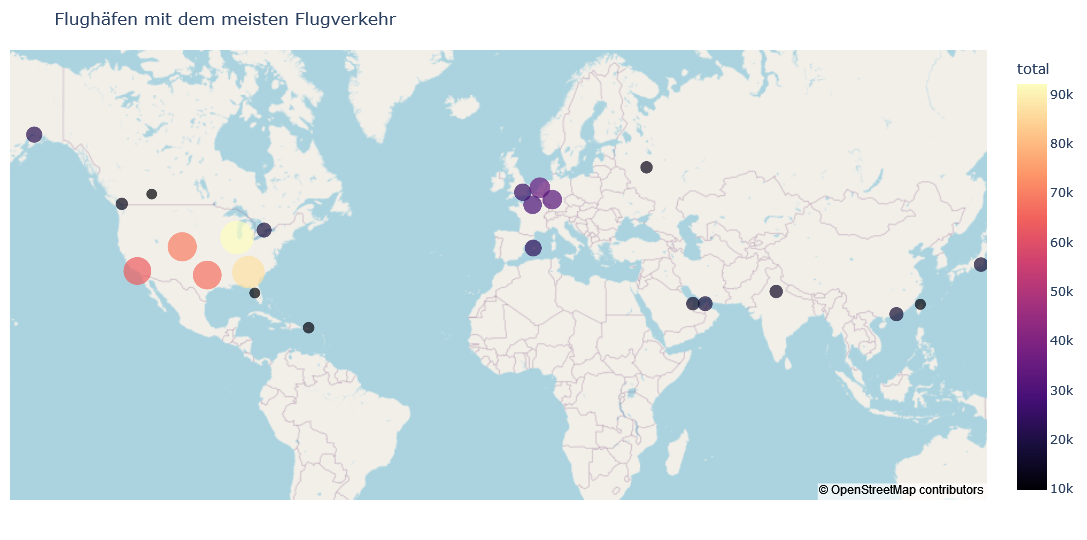

In [4]:
other = df_airports.loc[(df_airports['region'] != 'unkown') & (df_airports['region'] != 'USA') & (df_airports['region'] != 'Südeuropa') & (df_airports['region'] != 'Nordeuropa')].sort_values('total', ascending=False).head(10)
usa = df_airports.loc[df_airports['region'] == 'USA'].sort_values('total', ascending=False).head(5)
europa = df_airports.loc[(df_airports['region'] == 'Südeuropa') | (df_airports['region'] == 'Nordeuropa')].sort_values('total', ascending=False).head(5)
unkown = df_airports.loc[df_airports['region'] == 'unkown'].sort_values('total', ascending=False).head(5)

#5 biggest airports of each region
most_traffic = pd.concat([usa, europa, unkown, other])

fig = px.scatter_mapbox(most_traffic, lat="latitude", lon="longitude",
                  color="total", size="total",
                  color_continuous_scale='magma',
                  size_max=24, zoom=1.2, hover_name='municipality', 
                  hover_data = ['name'], 
                  title = 'Flughäfen mit dem meisten Flugverkehr',
                  width=900, height=540)
fig.update_layout(mapbox_style="open-street-map", margin=dict(l=10, r=10, t=50, b=40))
fig.show()

Es ist spannend zu betrachten, dass beispielsweise Mallorca mehr Flugverbindungen aufwies als Toronto. Mit Abstand am meisten Flugverkehr weist der internationale Airport von Chicaco auf, welcher nach kurzer Wikipedia-Recherche weltweit auch am meisten Flugverkehr darstellt. In Europa sind bis auf Mallorca die wohl bekanntesten Flughäfen vertreten mit: London, Paris, Frankfurt und Amsterdam. Ausserdem ist spannend zu sehen, dass Dubai weniger Flugverbindungen als Mallorca aufweist.

Um Knotenpunkte zu erkennen, sind die Anzahl Verbindungen sowie die Lage des Flughafens zu anderen Regionen ein wichtiger Punkt. Der wichtigste und Ausschlagsgebende Punkt um einen Flughafen als Knotenpunkt zu kennzeichnen, ist das Passagieraufkommen - denn Passagieranzahl != Flugverbindungen!<br>
Im Datenset sind keine Kennzahlen zum Passagieraufkommen vorhanden. Es kann jedoch davon ausgegangen werden, dass mehr Verbindungen zugleich mehr Passagiere bringen. Zur Analyse der Knotenpunkte von Flughäfen stützen wir uns infolgedessen auf die Anzahl Verbindungen sowie der Typ des Flughafens - ausserdem untersuchen wir die Anzahl unterschiedlicher Ziele des Flughafens welches nochmals Aufschluss auf die Vielfalt der Verbindungen des Flughafens gib

In [5]:
#TODO Knotenpunkte Fazit

### Längste Distanzen
Im folgenden Abschnitt möchten wir aufzeigen, welche Flugverbindungen die längsten Distanzen aufweisen. Dabei möchten wir beispielsweise aufzeigen, ob grosse Distanz gleich grosser Flughafen bedeutet. Weisen auch kleine Flughäfen grosse Distanzen auf? Wenn ja welche sind dies und warum?

index  Unnamed: 0 callsign  icao24 registration origin destination  \
0    481483      483355   ETH672  040102       ET-ASH   SBGR        RJAA   
1   1357455     1362354  ETH3739  04008c       ET-ARJ   VHHH        SBGR   
2    352200      353604   ETD68W  896534          NaN   YMML        LEMD   
3    994322      998034   QFA109  7c8069          NaN   YSSY        EGLL   
4     81085       81402   OPM007  008ba5          NaN   KOAK        FAOR   
5   2310962     2320342  FDX6003     NaN          NaN   YSSY        LFPG   
6   2076826     2085194   QFA109     NaN          NaN   YMML        EGLL   
7    646709      649161   ETD99E  8963ce       A6-BLA   YSSY        LSGG   
8   1786901     1793898  QFA7554     NaN          NaN   KJFK        YMML   
9   2011000     2019069    UNDEF     NaN          NaN   YMML        KTEB   
10  1451285     1456640    N880X  ac1fe2        N880X   YMEN        KTEB   
11  1893159     1900666    UNDEF     NaN          NaN   YSSY        EHAM   
12    18975       19054   N776WH  a061bc       N1234A   FAGM        WA46   
13       25          25   ETD39B  8964f9          NaN   YSSY        LSZH   
14   893135      896492  FDX5030  ac45d5       N890FD   YSSY        EDDK   
15  1843294     1850536   CCA577     NaN          NaN   YSSY        EDDF   
16    17010       17080   ETD33V  8964fb          NaN   YSSY        EDDM   
17   242578      243541   ETD141  896489       A6-BLI   YMML        CYYZ   
18    30594       30726   ETD11B  896536          NaN   WIII        KJFK   
19  2076911     2085279   QFA115     NaN          NaN   YBBN        EDDF   

           day      distance  counts      o_lat      o_long      d_lat  \
0   2021-05-12  18490.121459       1 -23.435556  -46.473057  35.764702   
1   2021-05-29  18017.353233       8  22.308901  113.915001 -23.435556   
2   2021-05-09  17286.348883       1 -37.673302  144.843002  40.471926   
3   2021-05-22  17016.029309       5 -33.946098  151.177002  51.470600   
4   2021-05-03  16966.825448       1  37.721298 -122.221001 -26.139200   
5   2021-09-17  16941.242499       2 -33.946098  151.177002  49.012798   
6   2021-09-13  16903.780987       1 -37.673302  144.843002  51.470600   
7   2021-05-15  16776.711316       1 -33.946098  151.177002  46.238098   
8   2021-09-08  16695.376130       2  40.639801  -73.778900 -37.673302   
9   2021-09-11  16674.466366       1 -37.673302  144.843002  40.850101   
10  2021-05-30  16671.430246       1 -37.728100  144.901993  40.850101   
11  2021-09-10  16653.428814       1 -33.946098  151.177002  52.308601   
12  2021-05-01  16635.935980       1 -26.242500   28.151199  45.830299   
13  2021-05-01  16565.313752       2 -33.946098  151.177002  47.464699   
14  2021-05-20  16560.284145       4 -33.946098  151.177002  50.865898   
15  2021-09-09  16492.326650       1 -33.946098  151.177002  50.033333   
16  2021-05-02  16308.426578       1 -33.946098  151.177002  48.353802   
17  2021-05-07  16248.915378       3 -37.673302  144.843002  43.677200   
18  2021-05-02  16180.472009       1  -6.125570  106.655998  40.639801   
19  2021-09-13  16097.875704       1 -27.384199  153.117004  50.033333   

        d_long  
0   140.386002  
1   -46.473057  
2    -3.562640  
3    -0.461941  
4    28.246000  
5     2.550000  
6    -0.461941  
7     6.108950  
8   144.843002  
9   -74.060799  
10  -74.060799  
11    4.763890  
12 -122.637001  
13    8.549170  
14    7.142740  
15    8.570556  
16   11.786100  
17  -79.630600  
18  -73.778900  
19    8.570556

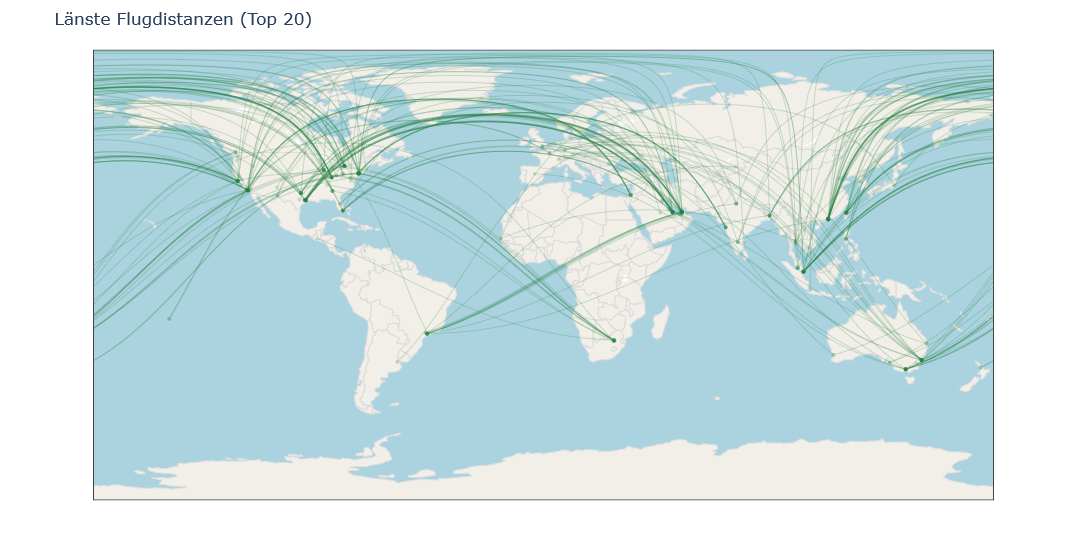

In [6]:
import plotly.graph_objects as go

##TODO: drop unnamed column

#create dictionary of airports
airportsDict = df_airports.set_index("ident").to_dict("index")

#only flights with distances > 1.0
flightDistances = df_flights[df_flights.distance > 1.0]
#sort flights by distance descending
flightDistances = flightDistances.sort_values(by=["distance"], ascending=False)
#assign airports group-count to flightDistances.counts
flightDistances["counts"] = flightDistances.groupby("distance")["distance"].transform("count")
#drop duplicates from flightDistances
flightDistances.drop_duplicates(subset=["distance"], inplace=True)

#add columns o_lat, o_long, d_lat, d_long
flightDistances["o_lat"] = flightDistances.origin.apply(lambda a: airportsDict[a]["latitude"])
flightDistances["o_long"] = flightDistances.origin.apply(lambda a: airportsDict[a]["longitude"])
flightDistances["d_lat"] = flightDistances.destination.apply(lambda a: airportsDict[a]["latitude"])
flightDistances["d_long"] = flightDistances.destination.apply(lambda a: airportsDict[a]["longitude"])

#first 200 flight distances
topFlightDistances = flightDistances.reset_index().head(200)

#display top 20 flight distances
display(topFlightDistances.head(20))


#create figure
fig = go.Figure()

#add flight traces to map
flight_paths = []
for index, row in topFlightDistances.iterrows():
    fig.add_trace(
        go.Scattergeo(
            locationmode = "country names",
            lon = [row["o_long"], row["d_long"]],
            lat = [row["o_lat"], row["d_lat"]],
            mode = "lines+markers",
            line = dict(width = 1, color = "#267F42"),
            opacity = 0.22,
            name = "",
            text = str(row["origin"])+" to "+str(row["destination"])+", "+str(round(row["distance"], 2))+"km, "+str(row["counts"])+" times",
            marker = {"size": 4}
        )
    )

#visualization adjustments
fig.update_traces(
    hoverinfo = "text",
)    

fig.update_layout(
    title_text = "Länste Flugdistanzen (Top 20)",
    showlegend = False,
    width=900, height=540,
    margin=dict(l=10, r=10, t=50, b=40),
    geo = dict(
        scope = "world",
        #projection_type = "orthographic",
        showland = True,
        showocean = True,
        showcoastlines = False,
        showcountries = True,
        landcolor = "#F2EFE9",
        countrycolor = "#DDDDDD",
        oceancolor = "#AAD3DF",
        bgcolor = "#FFFFFF",
    ),
)


### Unterschied Mai und September
Wie bereits bei Beginn kurz angedeutet, ist der Flugverkehr im September um rund 10'000 Verbindungen höher als im Mai. 



Unnamed: 0 callsign  icao24 registration origin destination         day  \
0           0   CCA583  78115f       B-1429   KLAX        EDDF  2021-05-01   
1           1  VCV3770  0d8429          NaN   LYBE        UUWW  2021-05-01   
2           2  UTN4490  508423       UR-AZK   UKBB        UKBB  2021-05-01   
3           3   CCA627  78103a       B-8577   ZGSZ        EDDF  2021-05-01   
4           4   CES553  780504       B-2001   RJBB        LFPG  2021-05-01   

      distance month  month_count  
0  9344.153346   May      1493562  
1  1694.492080   May      1493562  
2     0.000000   May      1493562  
3  9133.793170   May      1493562  
4  9648.489241   May      1493562

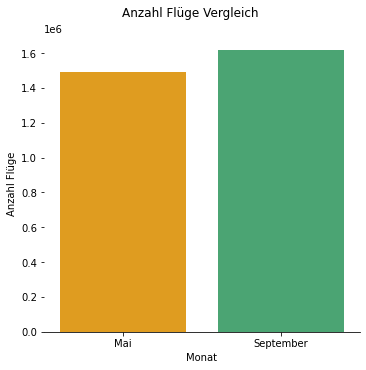

In [17]:
#diffs between may and sept
df_diff = df_flights
df_diff["month"] = df_diff["day"].apply(lambda day: "May" if "-05-" in day else "September")
df_diff["month_count"] =  df_diff.groupby("month")["month"].transform("count")
display(df_diff.head())


# flights mai vs sept
h = sns.catplot(
    data=df_diff, kind="bar",
    x="month", y="month_count",
    palette=sns.color_palette(['orange', 'mediumseagreen'])
)
_ = h.despine(left=True) #remove left spine
_ = h.set_axis_labels("Monat", "Anzahl Flüge")
_ = h.fig.subplots_adjust(top=0.9) 
_ = h.set(xticklabels=["Mai", "September"])
_ = h.fig.suptitle("Anzahl Flüge Vergleich")

### Beliebteste Routen

In [ ]:
# most popular routes [not working properly]
def popularRoutes(df):
    result = df
    result["route"] = df["origin"]+df["destination"]
    result["count"] =  result.groupby("route")["route"].transform("count")
    result.drop_duplicates(subset=["route"], inplace=True)
    result = result.sort_values(["count"], ascending=False).head(20)
    return result


popRoutes = popularRoutes(df_flights)
display(popRoutes.head(20))
    